In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import PIL
import matplotlib.pyplot as plt
from tqdm.notebook import trange,tqdm
import albumentations as A

# 1. DATA LOAD

In [2]:
df_train = pd.read_csv("datasets_fin/train.csv")

In [3]:
df_train.head()

,ID,target
0,002f99746285dfdd.jpg,16
1,008ccd231e1fea5d.jpg,10
2,008f5911bfda7695.jpg,10
3,009235e4c9c07af5.jpg,4
4,00b2f44967580c74.jpg,16


In [4]:
sorted(list(df_train['target'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [5]:
def load_image(file_name,root_folder="datasets_fin/train"):
    im = Image.open(f"{root_folder}/{file_name}")
    return im

In [6]:
im = load_image(df_train['ID'].iloc[0])

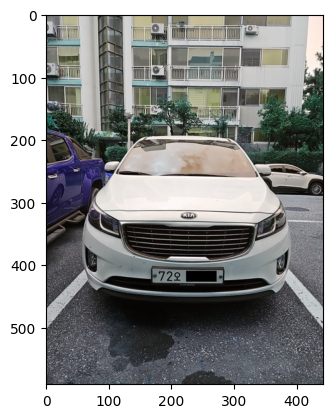

In [7]:
plt.imshow(im)

In [8]:
im.width, im.height

(443, 591)

In [9]:
for i in trange(len(df_train)):
    im = load_image(df_train.iloc[i]['ID'])
    df_train.loc[i,'width'] = im.width
    df_train.loc[i,'height'] = im.height

  0%|          | 0/1570 [00:00<?, ?it/s]

In [10]:
# 1, 13, 14 외에는 100개
df_train.groupby("target").count()['ID']

target
0     100
1      46
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13     74
14     50
15    100
16    100
Name: ID, dtype: int64

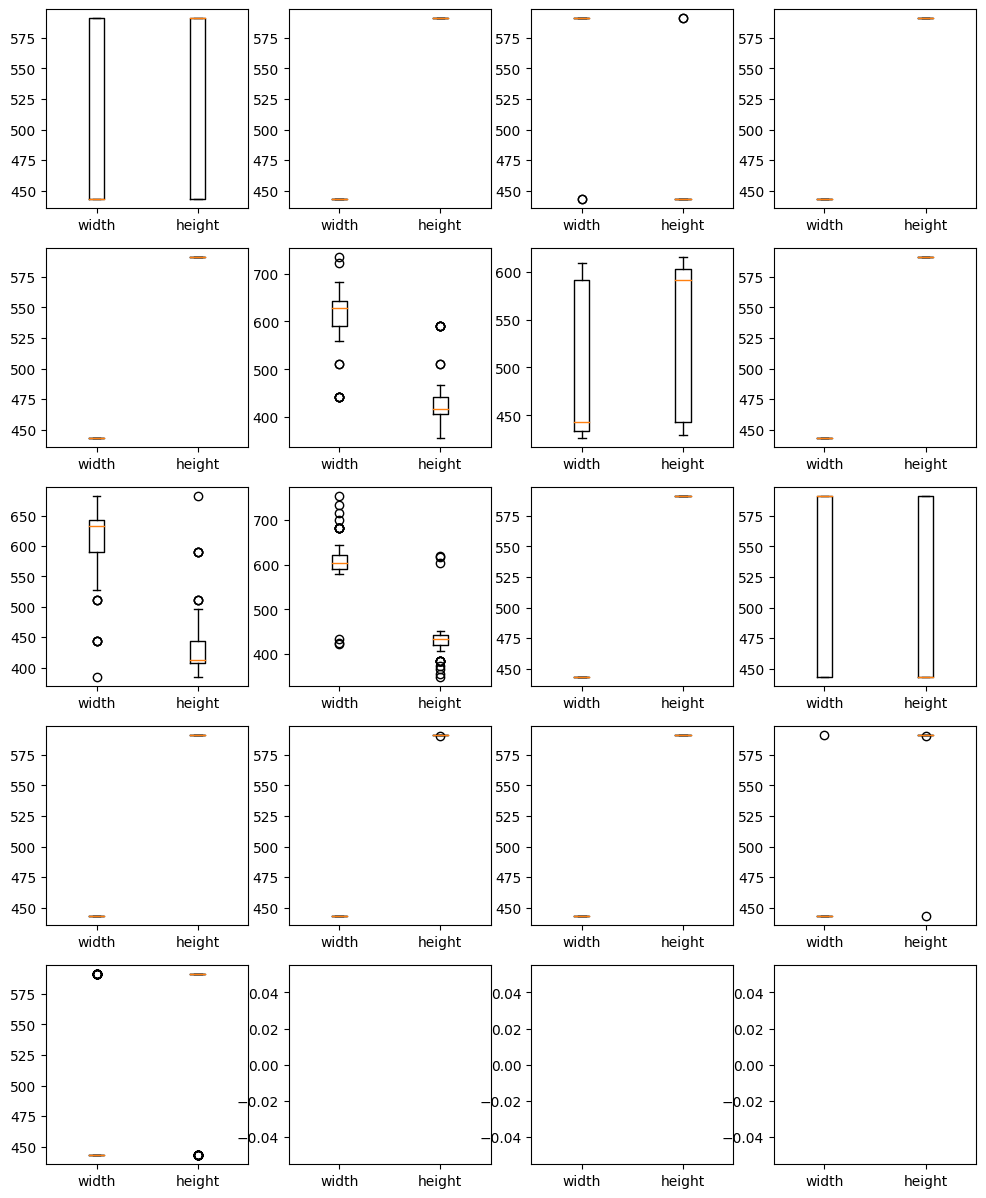

In [11]:
fig, axs = plt.subplots(5,4)
fig.set_size_inches(12,15)
for i in range(5):
    for j in range(4):
        idx = (i*4) + j
        axs[i,j].boxplot(
            [df_train[df_train['target']==idx]["width"].tolist(),df_train[df_train['target']==idx]["height"].tolist()],
            labels=["width","height"]
    )
fig.show()

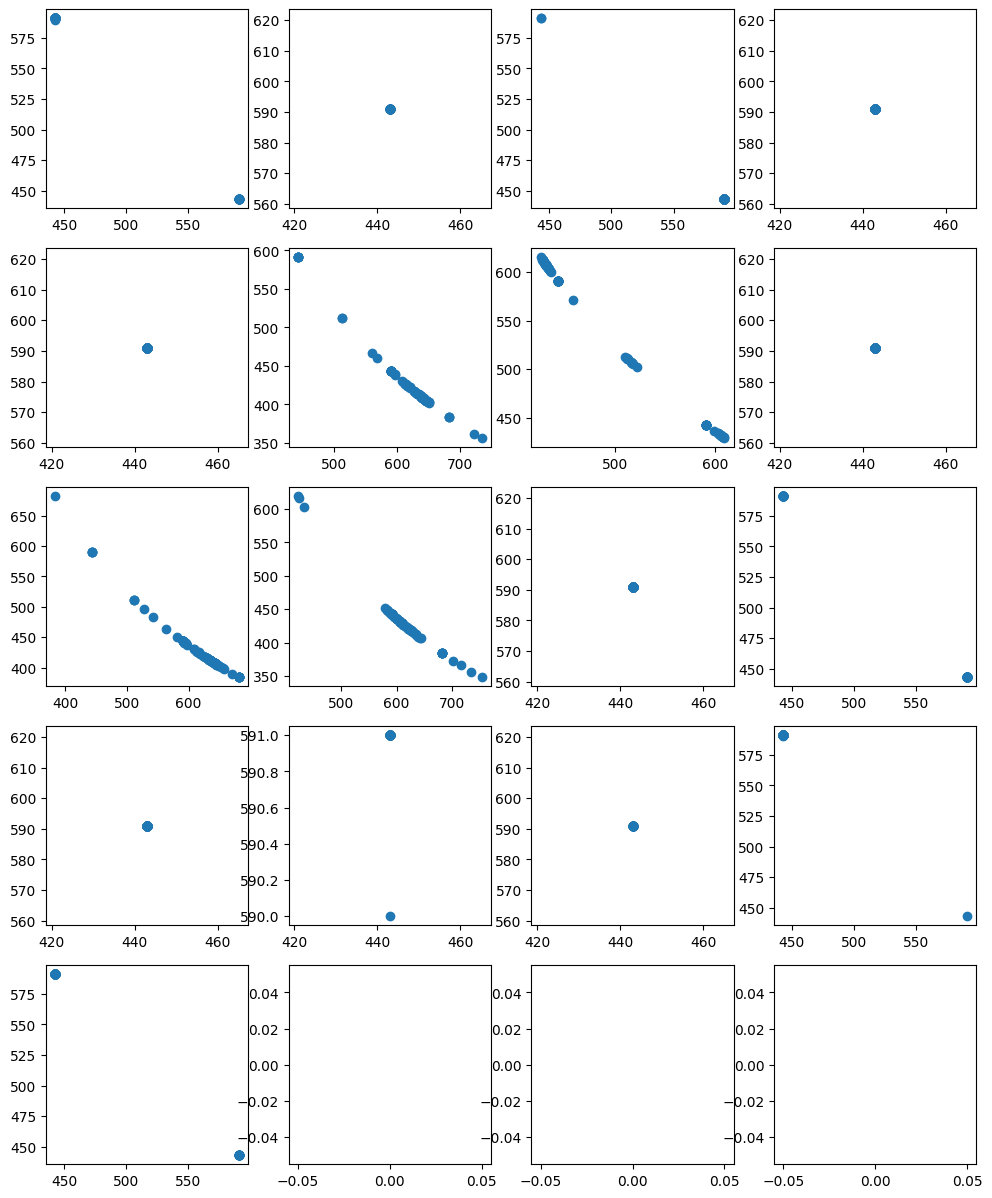

In [12]:
fig, axs = plt.subplots(5,4)
fig.set_size_inches(12,15)
for i in range(5):
    for j in range(4):
        idx = (i*4) + j
        axs[i,j].scatter(
            df_train[df_train['target']==idx]["width"],
            df_train[df_train['target']==idx]["height"]
        )
fig.show()